In [1]:
import os
import random
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


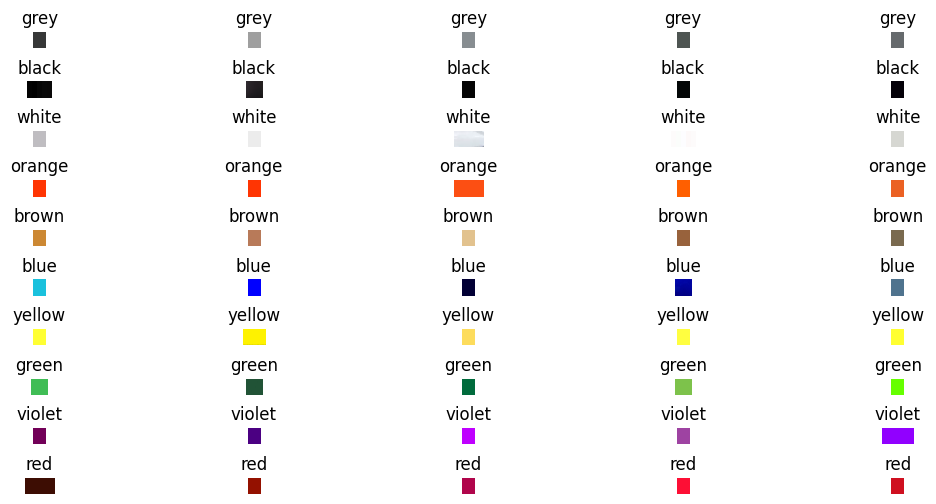

In [2]:
main_folder = 'training_dataset'

# Get a list of subfolders in the main folder
subfolders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]

# Create a figure with subplots for each subfolder
num_subplots = len(subfolders)
num_images_per_subfolder = 5
fig, axes = plt.subplots(num_subplots, num_images_per_subfolder, figsize=(12, 6))

for i, subfolder in enumerate(subfolders):
    subfolder_path = os.path.join(main_folder, subfolder)
    image_files = os.listdir(subfolder_path)
    
    # Randomly select five images from each subfolder
    selected_images = random.sample(image_files, num_images_per_subfolder)
    
    for j, image_file in enumerate(selected_images):
        image_path = os.path.join(subfolder_path, image_file)
        img = mpimg.imread(image_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(subfolder)  # Set the subfolder name as the title
        axes[i, j].axis('off')  # Turn off axis labels
        plt.subplots_adjust(wspace=2, hspace=2)
    
        
# Adjust spacing and display the plot
plt.savefig('images/training_dataset.png')
plt.show()



In [3]:
rgb_values, color = [], []

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    image_files = os.listdir(subfolder_path)
    
    for image_file in image_files:
        image_path = os.path.join(subfolder_path, image_file)
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        rgb_values.append(image[0][0])
        color.append(subfolder)


In [4]:
df = pd.DataFrame(rgb_values, columns = ['Red', 'Green', 'Blue'])
df['Color'] = color

In [5]:
df.describe()

,Red,Green,Blue
count,250.000000,250.00000,250.00000
mean,141.204000,112.41600,96.71600
std,89.485288,83.21238,86.68576
min,0.000000,0.00000,0.00000
25%,61.750000,42.50000,15.50000
50%,149.000000,106.00000,74.50000
75%,228.250000,183.50000,169.75000
max,255.000000,255.00000,255.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Red     250 non-null    uint8 
 1   Green   250 non-null    uint8 
 2   Blue    250 non-null    uint8 
 3   Color   250 non-null    object
dtypes: object(1), uint8(3)
memory usage: 2.8+ KB


<Axes: xlabel='Color'>

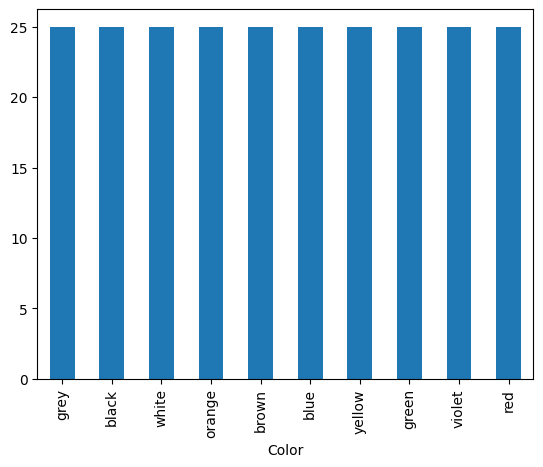

In [7]:
df['Color'].value_counts()
df['Color'].value_counts().plot(kind='bar')

In [8]:
df['Color'], original_names = pd.factorize(df['Color'])

original_names

Index(['grey', 'black', 'white', 'orange', 'brown', 'blue', 'yellow', 'green',
       'violet', 'red'],
      dtype='object')

In [9]:
df.head()
df.Color.value_counts()

Color
0    25
1    25
2    25
3    25
4    25
5    25
6    25
7    25
8    25
9    25
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
y = df['Color']
X = df.drop(['Color'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=9)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(misclassified))


Misclassified samples: 5


In [13]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print('Accuracy: {:.1f}'.format(accuracy_percentage))

Accuracy: 90.0


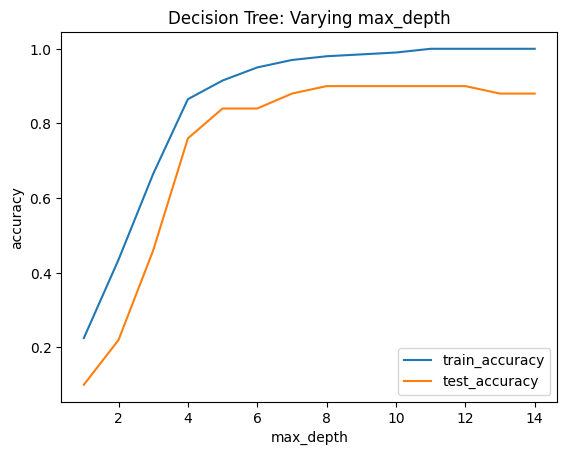

In [14]:
train_accuracy = []
test_accuracy = []

for i in range(1, 15):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    train_accuracy.append(dtree.score(X_train, y_train))
    test_accuracy.append(dtree.score(X_test, y_test))

x = range(1, 15)
y1 = train_accuracy
y2 = test_accuracy

plt.title('Decision Tree: Varying max_depth')
plt.plot(x , y1, label='train_accuracy')
plt.plot(x , y2, label='test_accuracy')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.savefig('images/accuracy_dtree.png')
plt.show()

In [15]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=9)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print('Accuracy: {:.1f}'.format(accuracy_percentage))

Accuracy: 88.0


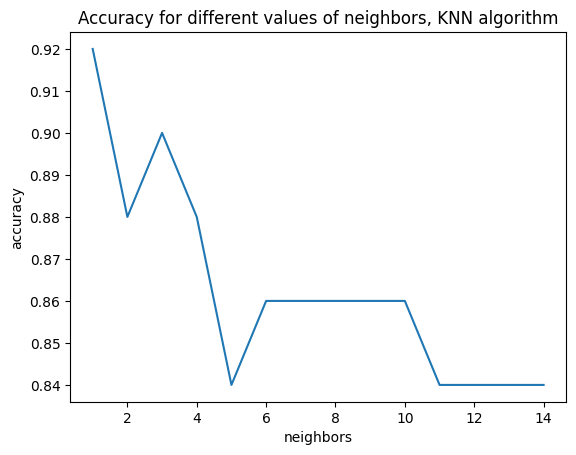

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

accuracy = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i+1, weights='distance', metric='euclidean')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

x = range(1, 15)
plt.title('Accuracy for different values of neighbors, KNN algorithm')
plt.plot(x, accuracy)
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.savefig('images/accuracy_knn.png')
plt.show()

In [17]:
kmodel = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
kmodel.fit(X_train, y_train)
y_pred = kmodel.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print('Accuracy: {:.1f}'.format(accuracy_percentage))

Accuracy: 92.0


In [18]:
label = kmodel.predict([[255, 255, 0]])
original_names[label[0]]

/home/daniel/Sem_2_2/AI/assign2/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'yellow'

In [19]:
import pickle

pickle.dump(kmodel, open('color_detection_model.pkl', 'wb'))
